# Reinforcement Learning

In this learning, we do both exploration and exploitation and get to optimal result as soon as we can. It is better than A/B Testing where a lot of money and time is spent.
In this notebook, I'll discuss and use two Reinforcement techniques:
1. Upper Confidence Bound
2. Thompson Sampling

It is **online learning** as we keep observing the data and learn from it. We do not randomly select ads to show but do so based on the previous data.

## Import libraries and dataset

In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


The dataset shows that there are 10 different ads and we want to maximise the Click Through Rate (CTR). Each row represents one user and corresponding are the values if they clicked on a certain ad or not.

## Upper Confidence Bound

**Algorithm:**
1. Ni(n) = Number of times the ith element was selected till round `n`
2. Ri(n) = Total rewards for ith element upto round `n`
3. Then calculate:
    1. Average reward for ith element till round n:
       ri = Ri(n) / Ni(n)
    2. Confidence bound:
       deltai = = sqrt(3*log(n)/2*Ni(n))
4. Select the element with the maximmum `ri + deltai`

In [36]:
numbers_of_selections = np.zeros(dataset.shape[1])
sums_of_rewards = np.zeros(dataset.shape[1])
ads_selected = []
total_reward = 0

In [37]:
for n in range(dataset.shape[0]):
    selected_ad = 0
    max_upper_bound = 0
    for i in range(dataset.shape[1]):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            confidence_bound = math.sqrt((3 * math.log(n + 1)) / (2 * numbers_of_selections[i]))
            upper_bound = average_reward + confidence_bound
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            selected_ad = i
    ads_selected.append(selected_ad)
    numbers_of_selections[selected_ad] += 1
    reward = dataset.values[n, selected_ad]
    sums_of_rewards[selected_ad] += reward
    total_reward += reward

In [38]:
total_reward

2178

This tells us how well we've been able to target the ads. It should be better than the random ad selection method.

In [41]:
pd.DataFrame(ads_selected).tail(50)

,0
9950,4
9951,4
9952,4
9953,4
9954,4
9955,4
9956,4
9957,4
9958,4
9959,4


We see that our algorithm considers the ad `4` to be the best ad to show to users.

We'll now see how many times each ad was selected

Text(0, 0.5, 'Number of times each ad was selected')

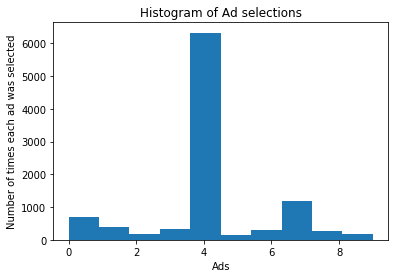

In [43]:
plt.hist(ads_selected)
plt.title('Histogram of Ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')

## Thompson Sampling

**Algorithm:**
1. For each round n, we consider two numbers for each ad i:
    1. N1i(n) = Number of times ad i got rewarded 1 till round n
    2. N0i(n) = Number of times ad i got rewarded 0 till round n
2. For each ad i, we select a value from the distribution:
    thetai(n) = Beta(N1i(n) + 1, N0i(n) + 1)
3. We select the ad i with the maximum thetai(n)

In [56]:
import random

numbers_of_rewards_1 = np.zeros(dataset.shape[1])
numbers_of_rewards_0 = np.zeros(dataset.shape[1])
ads_selected = []
total_reward = 0

In [57]:
for n in range(dataset.shape[0]):
    selected_ad = 0
    max_random = 0
    for i in range(dataset.shape[1]):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            selected_ad = i
    ads_selected.append(selected_ad)
    reward = dataset.values[n, selected_ad]
    if reward == 1:
        numbers_of_rewards_1[selected_ad] += 1
    else:
        numbers_of_rewards_0[selected_ad] += 1
    total_reward += reward

In [60]:
total_reward # Better than UCB

2587

Text(0, 0.5, 'Number of times each ad was selected')

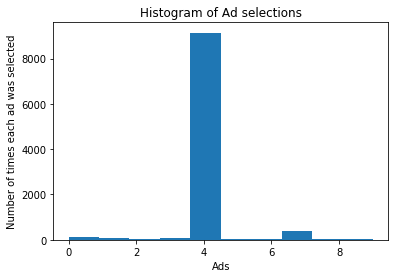

In [61]:
plt.hist(ads_selected)
plt.title('Histogram of Ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')

In [62]:
pd.DataFrame(ads_selected).tail(50)

,0
9950,4
9951,4
9952,4
9953,4
9954,4
9955,4
9956,4
9957,4
9958,4
9959,4
